# Upper Confidence Bound (UCB)

## Importing the libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
#                           ^click through rate

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


## Implementing UCB

In [8]:
N = 10000 #number of rounds/users
d = 10    #number of Ads
ads_selected = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if (numbers_of_selection[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 #super high value
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

## Visualising the result

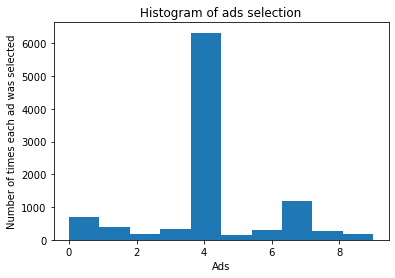

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()